# Fitness Landscape Exploration Sandbox on AURORA

In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

import flexs
from flexs import baselines as baselines
import flexs.utils.sequence_utils as s_utils
from flexs.baselines import explorers

2026-01-26 23:13:27.303974: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
## Building oracles for landscapes

# Most FLEXS landscapes have a problem registry: a dictionary of problems, parameters, 
# and metadata that can be used to quickly generate landscapes and set up interesting 
# benchmarks for models and explorers.

avgfp_landscape = flexs.landscapes.avGFPBrightness()
avgfp_wt = avgfp_landscape.gfp_wt_sequence

print(f'WT sequence: {avgfp_wt}, fitness: {avgfp_landscape.get_fitness([avgfp_wt])}')

WT sequence: MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK, fitness: [3.41908475]


In [ ]:
## Exploring the landscape with a model

# All exploration algorithms in this package inherit from a base `Explorer` 
# which performs some house-keeping tasks. To implement a new explorer, just 
# implement the `propose_sequences` method, which suggest new sequences at each round.

# We will compare performance among several explorers over 10 rounds with a 
# sequences_batch_size of 100 and model_queries_per_batch size of 1000.
ROUNDS = 10
aurora_explorer = flexs.baselines.explorers.AURORA(
    flexs.LandscapeAsModel(avgfp_landscape),
    population_size=10,
    max_iter=200,
    rounds=ROUNDS,
    starting_sequence=avgfp_wt,
    sequences_batch_size=100,
    model_queries_per_batch=1000,
)

/weka/scratch/weka/cbmm/kspiv/FLEXS/flexs/explorer.py:67: UserWarning: `model_queries_per_batch` should be >= `sequences_batch_size`
  warnings.warn(
/home/kspiv/.conda/envs/protein310/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(
/home/kspiv/.conda/envs/protein310/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at most 16 arguments, got 18
  warnings.warn(


Loading model from /om/user/kspiv/protein-evolution/ppo/avgfp_01172026...


In [8]:
aurora_sequences, metadata = aurora_explorer.run(avgfp_landscape)

round: 0, top: 3.419084748047576, time: 0.000314s
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used surrogate
Used 

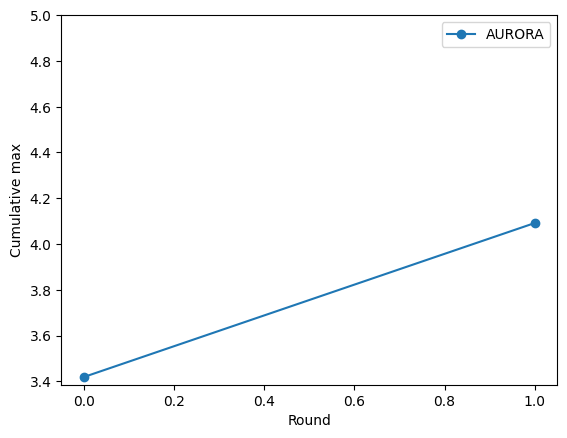

In [15]:
def cumulative_max_per_round(sequences):
    num_rounds = sequences['round'].max() + 1
    max_per_round = [sequences['true_score'][sequences['round'] == r].max()
                     for r in range(num_rounds)]

    return np.maximum.accumulate(max_per_round)

# plt.figure(figsize=(10,5), dpi=300)
# plt.plot(range(11), cumulative_max_per_round(random_sequences), 'o-', label="random")
# plt.plot(range(11), cumulative_max_per_round(adalead_sequences), 'o-', label="adalead")
# plt.plot(range(11), cumulative_max_per_round(genetic_algo_sequences), 'o-', label="genetic algo")
# plt.plot(range(11), cumulative_max_per_round(cmaes_sequences), 'o-', label="cmaes")
# plt.plot(range(11), cumulative_max_per_round(dynappo_sequences), 'o-', label="dyna_ppo")
# plt.plot(range(11), cumulative_max_per_round(cbas_sequences), 'o-', label="cbas")
# plt.plot(range(11), cumulative_max_per_round(bo_sequences), 'o-', label="evo bo")
plt.plot(range(ROUNDS+1), cumulative_max_per_round(aurora_sequences), 'o-', label="AURORA")
plt.ylabel("Cumulative max")
plt.xlabel("Round")
plt.legend()
plt.ylim(None, 5)
plt.show()


In [12]:
cumulative_max_per_round(aurora_sequences)

array([3.41908475, 4.09176302])

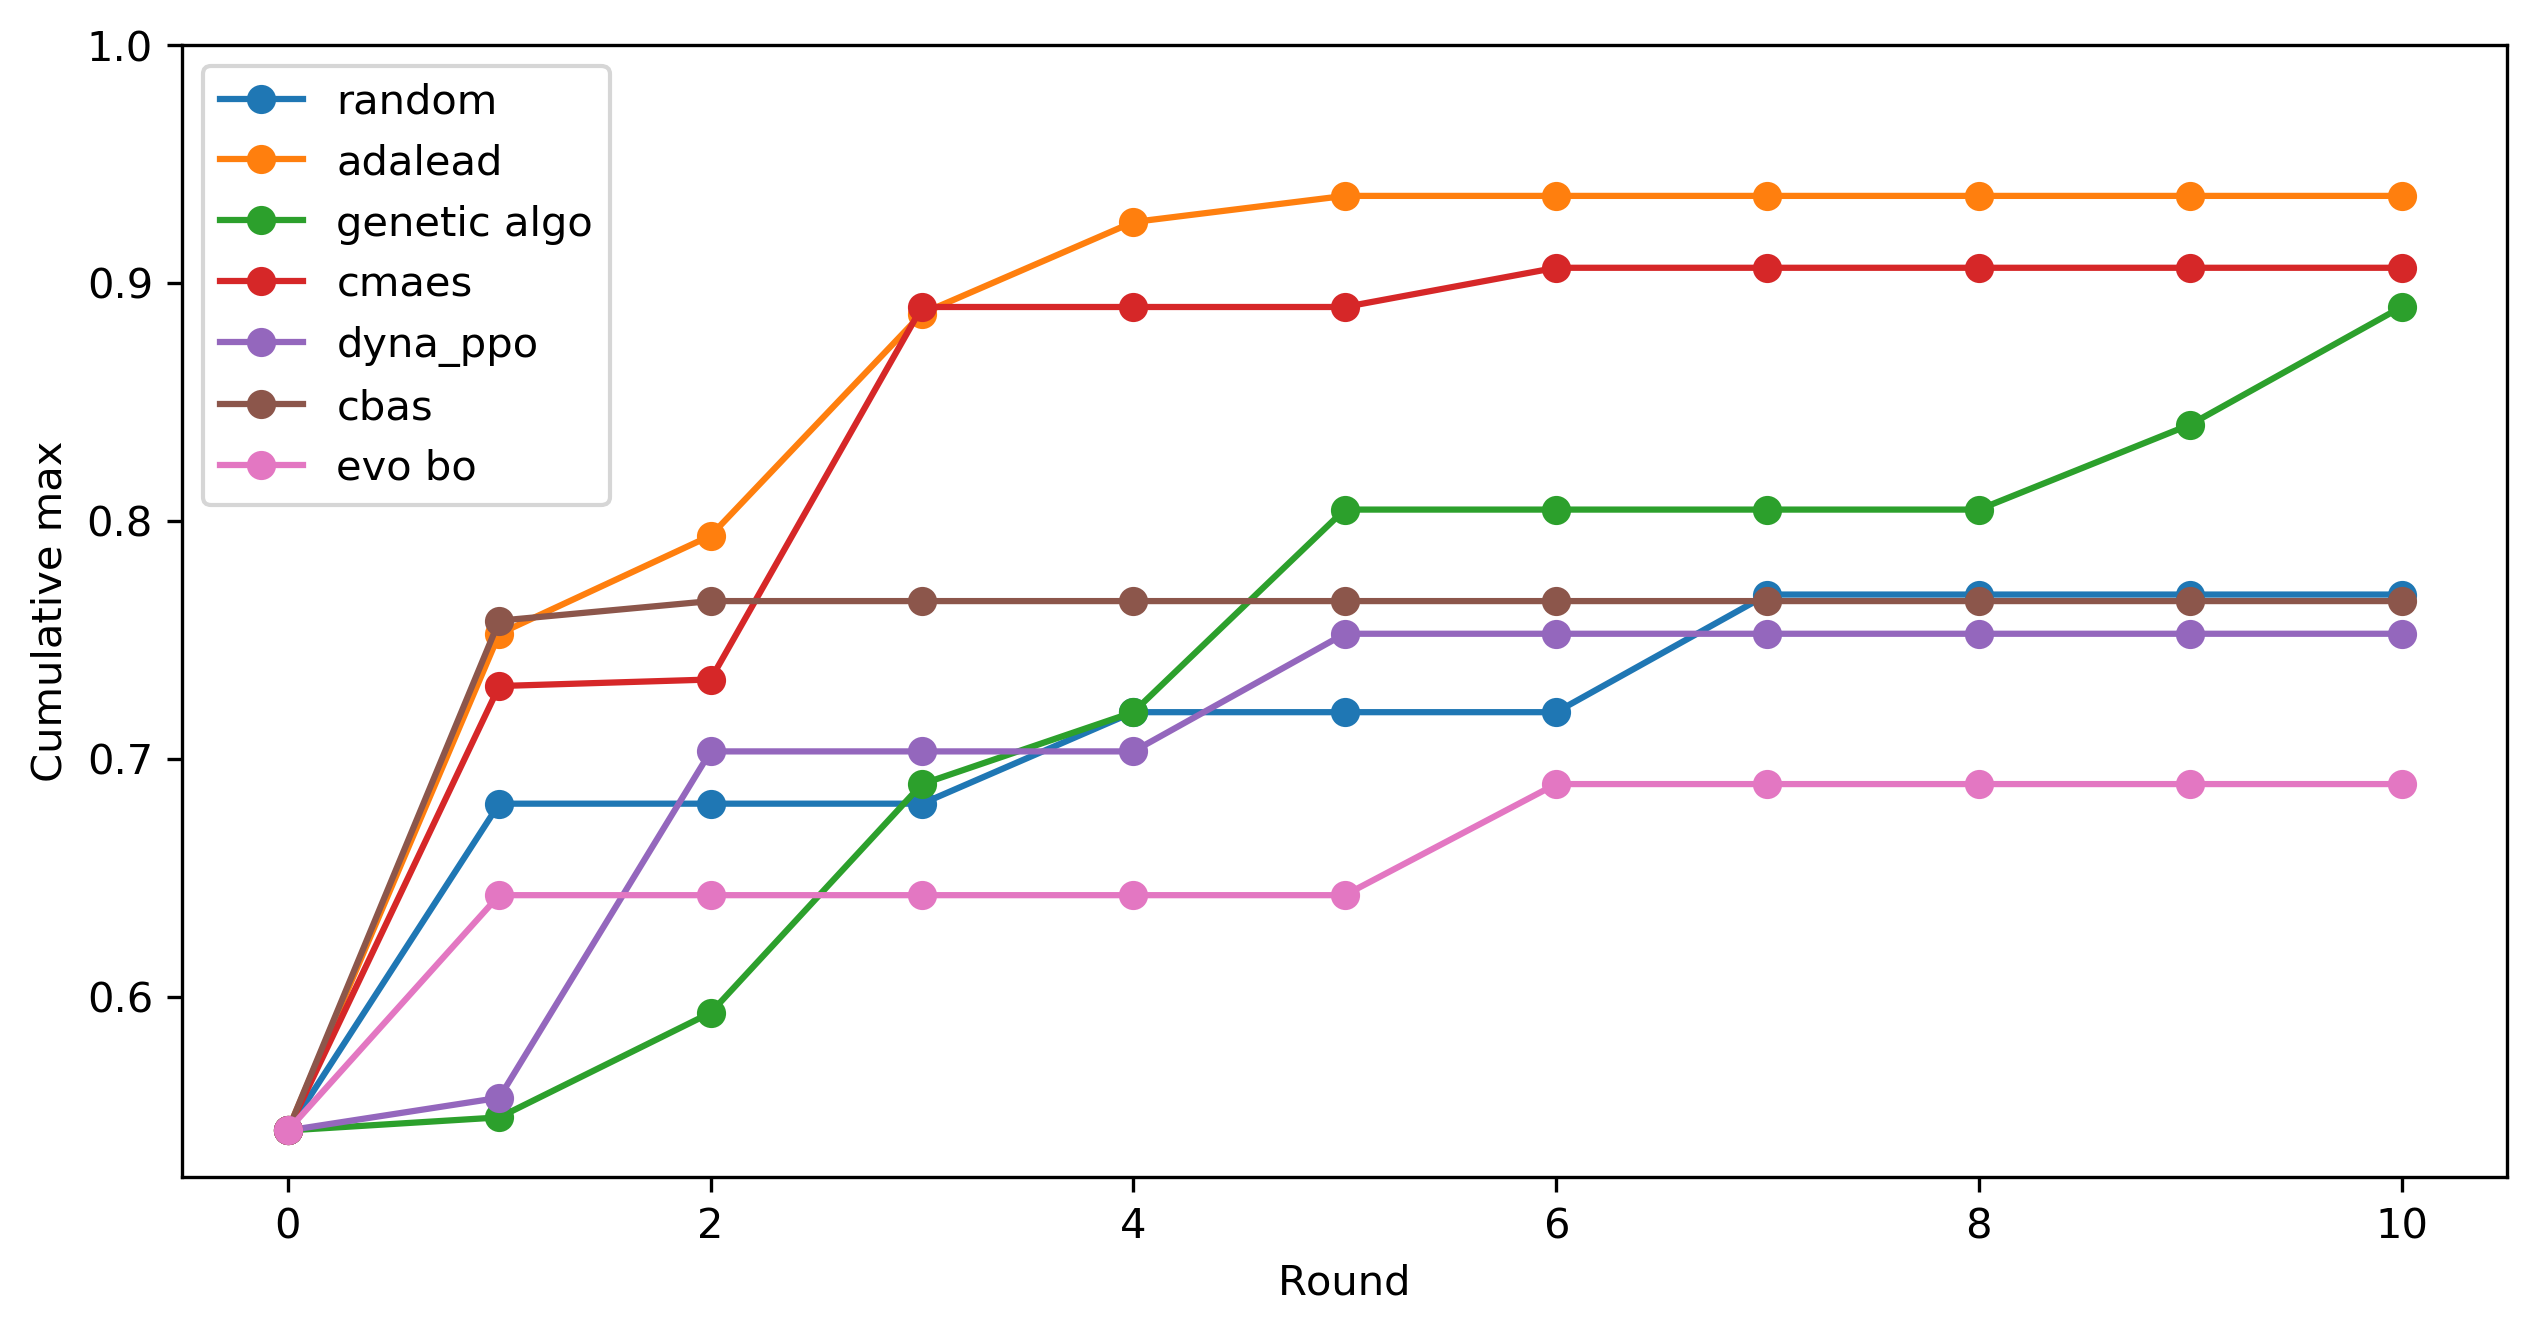

In [ ]:
def cumulative_max_per_round(sequences):
    num_rounds = sequences['round'].max() + 1
    max_per_round = [sequences['true_score'][sequences['round'] == r].max()
                     for r in range(num_rounds)]

    return np.maximum.accumulate(max_per_round)

# plt.figure(figsize=(10,5), dpi=300)
# plt.plot(range(11), cumulative_max_per_round(random_sequences), 'o-', label="random")
# plt.plot(range(11), cumulative_max_per_round(adalead_sequences), 'o-', label="adalead")
# plt.plot(range(11), cumulative_max_per_round(genetic_algo_sequences), 'o-', label="genetic algo")
# plt.plot(range(11), cumulative_max_per_round(cmaes_sequences), 'o-', label="cmaes")
# plt.plot(range(11), cumulative_max_per_round(dynappo_sequences), 'o-', label="dyna_ppo")
# plt.plot(range(11), cumulative_max_per_round(cbas_sequences), 'o-', label="cbas")
# plt.plot(range(11), cumulative_max_per_round(bo_sequences), 'o-', label="evo bo")
plt.plot(range(11), cumulative_max_per_round(aurora_sequences), 'o-', label="evo bo")
plt.ylabel("Cumulative max")
plt.xlabel("Round")
plt.legend()
plt.ylim(None, 1)
plt.show()

## 4. Evaluating an exploration algorithm <a class="anchor" id="section-four"></a>


The `flexs.evaluate` module can be used run tests aimed at different properties of the explorer. 

Tests include:
- `robustness`: shows how explorer performance changes with model quality (noisy abstract models at different signal strengths).
- `efficiency`: shows how explorer performance changes when more computational evals are allowed
- `adaptivity`: shows how the explorer is sensitive to the number of batches it is allowed to sample

In most cases, you want to set the `log_dir` argument on the explorer to write output to a .csv file to analyze later.

Here we will test out Adalead's robustness to varying model quality.

In [ ]:
def make_explorer(model, signal_strength):
    return baselines.explorers.Adalead(
            model,
            rounds=5,
            mu=1,
            starting_sequence=avgfp_wt,
            sequences_batch_size=100,
            model_queries_per_batch=1000,
            # alphabet=alphabet,
            log_file=f'robustness/aurora/{signal_strength}.csv'
        )

results = flexs.evaluate.robustness(avgfp_landscape, make_explorer, signal_strengths=[0, 0.5, 0.75, 0.9, 1])

Evaluating for robustness with model accuracy; signal_strength: 0
round: 0, top: 0.5437468768175177, time: 0.001216s
round: 1, top: 0.7304882670751143, time: 0.760548s
round: 2, top: 0.7634425930879556, time: 1.023346s
round: 3, top: 0.7634425930879556, time: 1.233608s
round: 4, top: 0.7716812138758213, time: 1.327146s
round: 5, top: 0.889767692798906, time: 1.342075s
Evaluating for robustness with model accuracy; signal_strength: 0.5
round: 0, top: 0.5437468768175177, time: 0.001503s
round: 1, top: 0.7002800956120209, time: 0.681261s
round: 2, top: 0.7963969714803375, time: 0.953963s
round: 3, top: 0.8266051429434308, time: 1.320071s
round: 4, top: 0.8815290196314998, time: 1.473321s
round: 5, top: 0.8815290196314998, time: 1.844178s
Evaluating for robustness with model accuracy; signal_strength: 0.75
round: 0, top: 0.5437468768175177, time: 0.001020s
round: 1, top: 0.7854121961427237, time: 0.790146s
round: 2, top: 0.9309606395996132, time: 1.146137s
round: 3, top: 0.9913768777667188

In [ ]:
plt.figure(dpi=300)
plt.title('AURORA performance with respect to signal strength')

# The output file contains metadata on the first line
for signal_strength in [0, 0.5, 0.75, 0.9, 1]:
    with open(f'robustness/adalead/{signal_strength}.csv') as f:
        metadata = json.loads(next(f))
        data = pd.read_csv(f)
    
    rounds = data['round'].unique()
    
    plt.plot(rounds, [data[data['round'] == r]['true_score'].max() for r in rounds], label=signal_strength)

plt.legend()

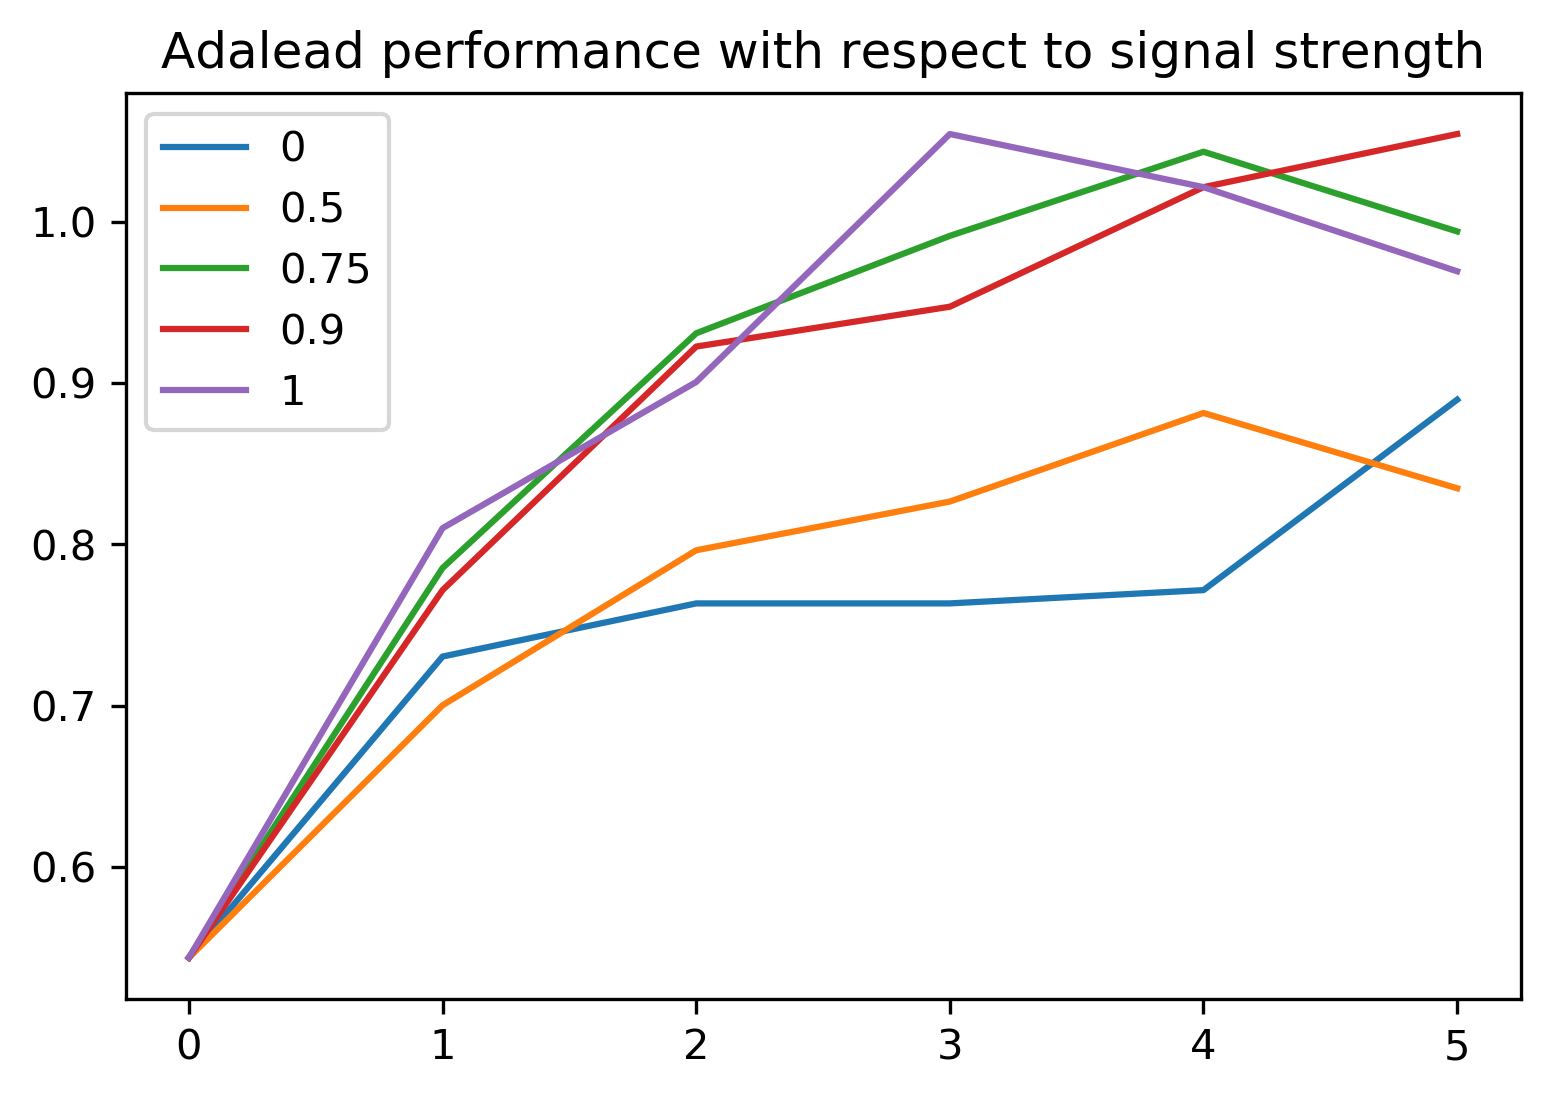

In [133]:
plt.figure(dpi=300)
plt.title('Adalead performance with respect to signal strength')

# The output file contains metadata on the first line
for signal_strength in [0, 0.5, 0.75, 0.9, 1]:
    with open(f'robustness/adalead/{signal_strength}.csv') as f:
        metadata = json.loads(next(f))
        data = pd.read_csv(f)
    
    rounds = data['round'].unique()
    
    plt.plot(rounds, [data[data['round'] == r]['true_score'].max() for r in rounds], label=signal_strength)

plt.legend()